# **CAP 이론**

- CAP 이론은 분산 데이터베이스 시스템에서 의미있는 이론.
- 분산 데이터베이스의 세 가지 속성인 일관성(Consistency), 가용성(Availability), 네트워크 파티션 허용(Partition tolerance)을 나타낸다.
- Network로 연결된 분산된 데이터베이스 시스템은 일관성(Consistency), 가용성(Availability), 분할 내구성(Partition Tolerance)의 3가지 특성중 2가지 특성만을 충족 할수 있고 3가지 모두 충족할 수 없다는 이론
- 분산 시스템에서 동시에 충족할 수 있는 세 가지 속성을 명확하게 정의함으로써, 시스템 설계자가 이 세 가지 속성 사이의 트레이드오프를 이해하고, 특정 애플리케이션의 요구 사항에 가장 잘 맞는 시스템을 선택하거나 설계하는 데 도움

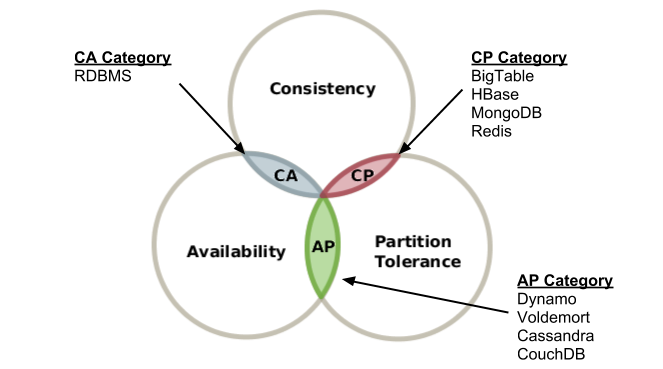

# **일관성(Consistency)**

- 일관성을 가진다는 것은 모든 데이터를 요청할 때 응답으로 가장 최신의 변경된 데이터를 리턴 또는 실패를 리턴한다는 것.

- 노드가 같은 시간에 같은 데이터를 보고, 읽기 작업이 항상 가장 최신의 쓰기 작업을 반영하며, 이는 모든 노드에 일관적으로 적용.

- 모든 읽기에 대해서 DB노드가 항상 동일한 데이터를 가지고 있어야한다는 의미.
  - DB가 2개의 Instance를 유지하고 있다면 A에 요청하든 B에 요청하든 동일한 값이 반환됨을 의미.
  - A에 update를 하든 B에 update를 했을 경우 누군가 동기화 되기전 READ를 한다면 바로 반환하는 것이 아니라 모두 동기화 후 READ가 되어야 함.



# **가용성(Availability)**

- 모든 요청은 성공 혹은 실패 여부와 무관하게 응답을 받음.

-  모든 요청은 유효한 데이터를 읽거나 쓸 수 있어야 하며, 이는 네트워크 인프라 및 클러스터의 노드 일부에 실패가 발생하더라도 READ와 WRITE 등의 동작은 항상 보장되어야 함.


# **분할 내구성(Partition Tolerance)**



- 분할 허용성(Partition Tolerance)은 분산 시스템이 네트워크 분할을 경험하더라도 계속 작동할 수 있음 / 장애 상황에 대처할 수 있는 능력을 의미
- 네트워크 분할이란 네트워크에서 일부 노드가 다른 노드와의 연결을 잃는 상황.

- 분산 데이터베이스가 세 개의 데이터 센터 (A, B, C)에 걸쳐 설치되어 있고, 데이터 센터에는 데이터베이스의 복제본이 있다고 가정.
  - 네트워크 문제로 인해 데이터 센터 A와 B는 서로 통신할 수 있지만, C는 다른 두 데이터 센터와의 연결을 잃었다고 가정.
  - 이런 상황을 네트워크 분할이라고 합니다.
  - 분할 허용성이 있는 시스템은 이런 문제를 견딜 수 있음.
  - A와 B는 계속해서 정상적으로 작동하고, C는 가능한 한 독립적으로 작동.
  - 네트워크 문제가 해결되면, 시스템은 C 데이터 센터의 데이터베이스 복제본을 다시 동기화하여 전체 시스템의 일관성을 복원.

- 분할 허용성이 없는 시스템은 이런 네트워크 분할 상황에 대처하기 어렵다.
  - 네트워크 분할이 발생하면, 시스템은 일관성을 유지하기 위해 모든 데이터 센터에서의 작동을 중단할 수 있음.
  - 시스템은 일부 데이터 센터에서만 계속 작동하되, 데이터 일관성에 문제가 생길 수 있음.


# **CA : Consistency(일관성) + Availability(가용성)**

- 일관성과 가용성을 동시에 완벽히 만족하려면, 네트워크 장애를 허용하지 않아야 한다.
  - 네트워크 장애가 절대 일어나지 않는 네트워크 구성이 가능할까 - 불가능.
  - CAP 이론은 네트워크 파티션 허용은 기본적으로 깔고 시작해야 한다.
  - 무조건 P를 선택하고, C와 A 중 하나를 골라야 한다.

- 데이터에 대한 강한 신뢰를 주지만 네트워크 문제가 생길 시 전체 시스템 중단으로 이어진다.
  - 여러대 노드중에 하나라도 연결이 끊기면 모든 노드는 일관성과 가용성을 지키기 위해 노드에 접근을 하지 못하게 할것.

**장점**

- 데이터의 가용성이 높아져서 시스템이 언제나 사용이 가능.
- 데이터 변경이 한 노드에 일어날 경우 모든 노드에 반영되기 때문에, 데이터의 정합성과 신뢰성을 보장할 수 있다.

**단점**
- 네트워크 지연이 발생할 때 일관성을 유지하기 위해서 모든 노드간의 데이터 동기화 시간이 필요하여 성능에 영향이 미침.
- 일부 노드가 장애가 발생할 경우엔 시스템 가용성이 떨어지거나 데이터 일관성에 문제가 발생할 수 있다.

**금융 업무, 거래 처리같은 일관성과 정확성이 중요한 서비스에 적합**



# **CP : Consistency(일관성) + Partition Tolerance(분할 허용)**

- 완벽한 일관성을 갖는 분산 시스템에서 데이터 변경은 존재하는 모든 노드에 복제되어야 완료된다.
 - 가용성과 성능에 크나큰 악영향을 끼친다.
- 만약 하나의 노드라고 문제가 있으면 트랜잭션은 실패한다.
 - 노드가 늘어날 수록 지연시간은 길어진다.
- 일관성과 분할 허용을 충족하기 때문에 높은 확장성을 가지고 있다.
- 어떤 노드에서 문제가 발생하면 해당 노드를 제외시켜 일관성을 유지한다.

**장점**
- 데이터의 일관성을 유지하기 때문에, 데이터 정합성은 높다. 일관성을 유지하기 위해 노드간의 통신이 빈번하게 일어나므로 데이터 손실이 일어날 가능성이 작다.

**단점**
- 어떤 노드에서 문제가 발생하면, 해당 노드를 제외해야하므로 가용성이 떨어진다.데이터 일관성을 위해 추가적인 리소스가 필요므로 시스템 성능이 저하될 가능성이 크다.

# **AP : Availiability(가용성) + Partition Tolerance(분할 허용)**

- 완벽한 가용성을 갖는 분산 시스템에서는 모든 노드가 어떤 상황에서도 응답할 수 있어야 한다.
- 네트워크 문제가 발생해서 어떤 노드에 Replication이 제대로 이루어지지 않아도 가용성을 위해서 해당 노드에 접근한 사용자에게 데이터를 반환한다고 생각해보자.
- 일관성이 깨진 것은 당연하고 사용자는 문제가 발생한 것을 인지도 못할 것이다.
- 시스템이 언제나 가용 가능하며, 네트워크 상황이 불안정하거나 서버 장애가 발생해도 시스템이 계속 작동할 수 있다.
- 시스템 내부에서 발생한 데이터 변경 요청은 가능한 모든 노드에 반영되지만, 일관성은 보장 못한다.

**장점**
-  시스템이 언제나 가용하며, 장애 상황이 와도 시스템이 계속 작동이 가능하다. 네트워크 상황이 불안정해도 시스템이 작동 가능하다.

**단점**
- 데이터의 일관성이 보장되지 않으므로 일부 사용자는 다른 사용자와 다른 데이터를 볼 수 있다. 여러 노드 간의 데이터 동기화 시간이 필요하지 않으므로 빠른 응답 시간을 보장할 수 있지만, 데이터 일관성에는 손실이 발생 할 수 있다.


**AP는 SNS, 채팅, 게임 등 빠른 응답이 필요한 서비스에 사용**

# **실제 DB 비교**

# **MYSQL**

**MySQL은 관계형 데이터베이스 관리 시스템(RDBMS)으로, 일반적으로 단일 노드에서 작동. 그러나 분산 시스템으로 구성할 수도 있으며, CAP 이론을 적용.**

- 일관성(Consistency): MySQL은 ACID 트랜잭션을 지원하므로, 이를 통해 데이터 일관성을 보장. 모든 트랜잭션은 데이터베이스에 일관된 상태를 남김. 모든 읽기 작업은 가장 최신의 쓰기 작업을 반영. MySQL을 분산 시스템으로 구성하는 경우, 일관성을 보장하는 것은 더 복잡해질 수 있음.
 - 예를 들어, 복제(replication)를 사용하는 경우, 마스터 노드에서 슬레이브 노드로의 변경 사항 복제에는 약간의 지연이 있을 수 있으므로, 이로 인해 일시적인 불일치가 발생할 수 있음.

- 가용성(Availability): MySQL은 일반적으로 높은 가용성을 제공하도록 설계.
 - 예를 들어, 복제 기능을 사용하면 여러 노드에 데이터를 복제하여 단일 노드 장애가 전체 시스템의 가용성을 저하시키지 않도록 할 수 있습니다.
 - 그러나 이러한 방식은 추가적인 복잡성을 초래하며, 데이터 일관성 유지에 더 많은 노력을 필요로 할 수 있습니다.

- 분할 허용성(Partition Tolerance): MySQL은 네트워크 분할에 대한 내성이 제한적. 일반적인 MySQL 구성에서 네트워크 분할이 발생하면, 분할된 영역에서 작동하는 노드는 다른 노드와의 동기화를 잃게 되므로 일관성 문제가 발생할 수 있음. 따라서 MySQL은 기본적으로 CAP 이론의 “CP” 모델을 따르지 않음.
 - 일반적인 MySQL 설정은 CAP 이론의 “CA” 모델을 따르며, 분산 환경에서의 네트워크 분할에 대한 내성은 제한적. 그러나 분산 MySQL 설정(예: Galera Cluster)은 이러한 한계를 극복하기 위해 설계. 설정에서는 네트워크 분할 시에도 일관성을 유지하는 방법으로 설계되어 CAP 이론의 “CP” 모델을 따르게 됨.

# **AuroraDB Mysql**
**AWS Aurora는 MySQL과 호환되는 완전 관리형 관계형 데이터베이스 서비스. Aurora는 고가용성 및 내구성을 제공하기 위해 여러 가용 영역에 데이터를 자동으로 복제. AuroraDB에서 CAP 이론을 적용.**

- 일관성(Consistency): AWS Aurora는 일관성을 위해 강력한 복제 기능을 제공. writer 노드에서 발생한 변경 사항은 거의 즉시 모든 reader 노드에 복제. 즉, 각 트랜잭션 후에 Aurora는 모든 노드에 대해 일관성을 보장.

- 가용성(Availability): Aurora는 높은 가용성을 제공. writer 노드가 실패하면, 가용한 reader 노드 중 하나가 writer 역할을 자동으로 인수하므로 중단 시간을 최소화. Aurora는 여러 가용 영역에 데이터를 복제하여 지역 장애에 대한 내성을 제공.

- 분할 허용성(Partition Tolerance): AWS 인프라의 분산 특성 덕분에 Aurora는 네트워크 분할에 대한 허용성을 제공. 가용 영역 간에 네트워크 분할이 발생하더라도 Aurora 클러스터는 작동을 계속할 수 있음. writer 노드가 가용하지 않게 되면 Aurora는 다른 노드를 writer로 승격시키는 메커니즘을 통해 서비스를 계속 제공할 수 있음.
Aurora는 데이터베이스가 여러 가용 영역에 걸쳐 분산되어 있음에도 불구하고, 데이터 일관성과 높은 가용성을 유지하면서 네트워크 분할을 허용하는 방식으로 CAP 이론을 구현.

 - 모든 분산 시스템과 마찬가지로, 특정 상황(예: 네트워크 분할 동안에 writer가 실패하고, 동시에 새 writer의 선출에 시간이 걸리는 경우)에서는 Aurora도 CAP 이론의 제약 사항을 경험할 수 있음. 이러한 경우에는 일관성과 가용성 사이에 잠재적인 트레이드오프가 있을 수 있음.

# **MongoDB**
**MongoDB는 NoSQL 데이터베이스로, 분산 시스템에서 유용하며 CAP 이론을 적용.**

- 일관성(Consistency): MongoDB는 기본적으로 “최종 일관성(eventual consistency)” 모델을 따름. 데이터 복제가 일어나는 분산 시스템에서, 모든 복제본이 즉시 동기화되지 않을 수 있음을 의미. 따라서 일시적으로 일부 클라이언트가 다른 클라이언트와 다른 데이터를 보는 상황이 발생할 수 있음. 하지만 시간이 지나면 모든 변경 사항이 모든 복제본에 동기화되므로, 시스템은 “최종적으로 일관성”을 가지게 됨.

- 가용성(Availability): MongoDB는 가용성을 매우 중요하게 생각. 클러스터 내에 여러 복제본을 유지함으로써, 한 노드가 실패하더라도 서비스는 계속될 수 있음. 이는 복제 세트라는 기능을 통해 이루어짐 복제 세트는 같은 데이터의 복사본을 가진 노드들의 그룹으로, 주(primary) 노드가 실패하면 보조(secondary) 노드 중 하나가 주 노드 역할을 대신.

- 분할 허용성(Partition Tolerance): MongoDB는 네트워크 분할 상황을 처리할 수 있도록 설계. 네트워크 분할이 발생하면, 복제 세트의 주 노드가 네트워크 분할로 인해 다수의 보조 노드와 연결을 끊게 될 수 있음. 이런 경우, 연결이 끊긴 보조 노드들은 새로운 주 노드를 선출하여 서비스를 계속 제공할 수 있음.  MongoDB는 네트워크 분할이 발생해도 서비스 운영을 계속할 수 있도록 하는 분할 허용성을 제공.
 - MongoDB는 CAP 이론에서 가용성(Availability)과 분할 허용성(Partition Tolerance)을 중점적으로 고려하며, 일관성(Consistency)은 최종적으로 달성. 하지만 MongoDB에서도 다양한 설정과 튜닝을 통해 이 세 가지 속성 사이의 균형을 필요에 따라 조정.

# **REDIS**

**Redis는 인 메모리 데이터 저장소로서 빠른 속도와 유연성을 제공하며, 주로 캐싱, 메시징 큐, 세션 관리 등에 사용. Redis의 CAP 이론 적용은 구성 방식에 따라 다르지만 기본적으로 다음과 같이 적용**

- 일관성(Consistency): Redis는 단일 노드 구성에서는 완벽한 일관성을 제공. 모든 클라이언트는 항상 가장 최신의 데이터를 볼 수 있음. 그러나 Redis를 클러스터 모드로 운영하게 되면, 쓰기 연산이 노드 간에 동기적으로 복제되지 않으므로 일시적으로 일관성이 손상될 수 있음.

- 가용성(Availability): Redis는 싱글 노드나 마스터-슬레이브 구성에서는 마스터 노드가 가용한 한 항상 가용성을 제공. 슬레이브 노드는 마스터 노드의 복제본이므로 마스터 노드가 실패할 경우 슬레이브 노드가 마스터의 역할을 수행할 수 있음. 클러스터 모드에서는 노드 간에 데이터가 샤딩되므로, 개별 노드의 실패는 해당 노드에 저장된 키의 가용성에만 영향을 미침.

- 분할 허용성(Partition Tolerance): Redis 클러스터 모드는 네트워크 분할을 허용. 네트워크 분할이 발생하면, Redis 클러스터는 “분할 브레인(split-brain)” 상황을 방지하기 위해 자동으로 마이너리티 파티션을 읽기 전용 모드로 전환. 이는 CAP 이론에서 한번에 두 가지만 충족할 수 있음을 보여주는 예시로, Redis 클러스터는 네트워크 분할 상황에서 가용성을 희생하고 일관성을 유지.
 - Redis의 CAP 특성은 구성에 따라 달라질 수 있음. 단일 노드 구성에서는 일관성과 가용성을 갖지만 분할 허용성은 없음. 반면 클러스터 구성에서는 일관성과 분할 허용성을 갖지만, 네트워크 분할 상황에서 가용성이 제한적일 수 있음.






# **PACELC이론**

- PACELC 이론은 분산 시스템에서 데이터 일관성과 가용성 간의 상충 관계를 설명하는 이론.
- PACELC 이론은 CAP 이론으로 부족한 부분을 보완하기위해 네트워크 장애 상황과 정상 상황으로 나누어서 설명.
-  P(네트워크 파티션)상황에서 A(가용성)과 C(일관성)의 상충 관계와 E(else, 정상)상황에서 L(지연 시간)과 C(일관성)의 상충 관계를 설명.




- P (Partition tolerance): 분산 시스템 내의 노드들이 서로 통신 불가능한 상황(네트워크 분리 등)이 발생할 경우, 그 상황을 감지하고 적절한 조치를 취하는 능력.
 - 네트워크 분리 상황에서도 시스템은 동작해야 한다.

- A (Availability): 분산 시스템 내의 노드들 중 일부가 고장나거나 서비스를 중지시키는 상황이 발생해도, 전체 시스템은 계속해서 동작할 수 있는 능력.
 - 언제나 서비스를 제공할 수 있어야 한다.

- C (Consistency): 분산 시스템 내의 노드들이 서로 다른 버전의 데이터를 가지고 있을 경우, 일관성 있는 데이터를 유지하는 능력.
 - 모든 노드에서 같은 데이터를 보장해야 한다.

- E (Eventual consistency): 동시성이 보장되지 않는 데이터 변경 작업에 대해, 어느 정도 시간이 지나면 해당 변경 사항이 모든 노드에 반영된다는 것을 보장하는 능력.
 - 시간이 지나면 모든 노드가 같은 데이터를 가지게 된다.

- L (Latency): 분산 시스템의 각 노드들 간의 통신 지연 시간.
 - 모든 노드가 동일한 속도로 동작할 수 있어야 한다.

- C (Communication cost): 분산 시스템 내의 노드들 간의 통신 비용.
 - 최소한의 비용으로 통신이 이루어져야 한다.

- PACELC 이론은 이러한 상황에서, 분산 시스템이 어느 한 가지에 더 중점을 둬야 하는지를 선택하도록 안내.
- 예를 들어 P와 L에 더 중점을 둔다면, 시스템이 네트워크 분리 상황에서도 동작 가능하면서, 각 노드들 간의 통신 지연 시간을 최소화하는 방향으로 시스템을 설계할 수 있다.

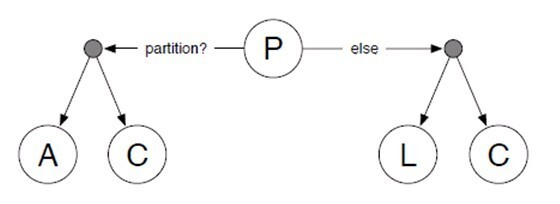

- PACELC 이론에서는 장애 상황, 정상 상황에서 어떻게 동작하는지에 따라 시스템을 PC/EC, PC/EL, PA/EC, PA/EL로 나눌 수 있다.
-  MySQL을 예로 들자면, 마스터-슬레이브로 구성된 MySQL 서버는 기본적으로 PA/EL이다.
-  MySQL에 쓰기 작업을 끝내자 마자 읽으려고 했다가 데이터가 없어서 당황했던 적이 있다.
-  즉 E(else, 정상)상황에서 L(지연 시간)을 C(일관성)보다 집중해서 일어난 케이스.
-  MySQL은 따로 설정하지 않으면 마스터에 트랜잭션 발생시 비동기적으로 슬레이브에 데이터를 복제(async replication)함.
-  복제될 때까지 딜레이를 주고 접근하게 코드를 수정했었다.

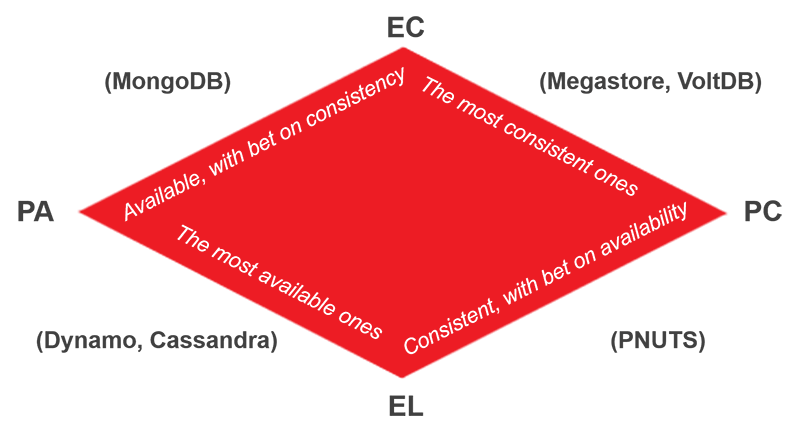

# **실제 DB 비교**

# **HBase**
- PC/EC.
- 장애 상황일때 C를 위해 A를 희생.
- 그렇지 않은 경우에도 C를 위해 L을 희생.

# **Cassandra**
- PA/EL이 가능하도록 디자인.
- 설정에 따라 Eventual Consistency의 특성을 가지게 되는데, 이 경우 PA/EL이 됨.
- 장애 상황인 경우 에는 가능한 노드에만 데이터를 반영하고 정상으로 복구되면 필요한 노드에 데이터 를 모두 반영.
- 정상상황일때도 Latency를 위해 모든 노드에 데이터를 반영하지 않음.

# **Brewer**
- 가상의 분산시스템은 PA/EC.
- 정상적인 경우에는 모든 노 드에서 같은 메세지를 볼 수 있도록 쓰기 연산이 일어나는데 P 상황인 경우, 이를 판단하여 일단 접근 가능한 만큼만 데이터를 반영한다 결과적으로 시스템은 디운되 지 않지만 절단된 노드들 끼리는 데이터를 주고 받지 못하게 됨.
- 장애상황이 복구 되면 이를 감지하여 전달하지 못한 데이터를 반영.
- 장애상황일때에만 C를 포 기하고 보통의 상황에서는 강력한 C를 가져가는 것.